# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [205]:
import pandas as pd

---
## 2. Load data

In [206]:
data = pd.read_csv('/content/clean_data_after_eda.csv')

In [207]:
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [209]:
data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_p

In [210]:
data["date_activ"]= pd.to_datetime(data["date_activ"],format='%Y-%m-%d')
data["date_end"] = pd.to_datetime(data["date_end"],format='%Y-%m-%d')
data["date_modif_prod"] = pd.to_datetime(data["date_modif_prod"],format='%Y-%m-%d')
data["date_renewal"]= pd.to_datetime(data["date_renewal"],format='%Y-%m-%d')

In [211]:
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [213]:
data.shape

(14606, 44)

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [214]:
price_df = pd.read_csv('/content/price_data (1).csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [215]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [216]:
data = pd.merge(data, diff , on = 'id')

data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916


#### Average price changes as time passes By computing the average price changes over certain time periods rather than the entire year, we can now improve the feature that our colleague created

In [217]:
price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

### Max price changes across period

In [218]:
# Aggregate average Prices per period

In [219]:
group_mean_price = price_df.groupby(['id']).agg({ 'price_off_peak_var':'mean', 'price_peak_var':'mean',
       'price_mid_peak_var':'mean', 'price_off_peak_fix':'mean', 'price_peak_fix':'mean',
       'price_mid_peak_fix':'mean'}).reset_index()

In [220]:
group_mean_price.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [221]:
group_mean_price.columns

Index(['id', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')

In [222]:
group_mean_price['off_peak_price_change'] = group_mean_price['price_off_peak_var'] - group_mean_price['price_off_peak_fix']
group_mean_price['peak_price_change'] = group_mean_price['price_peak_var'] - group_mean_price['price_peak_fix']
group_mean_price['mid_peak_price_change'] = group_mean_price['price_mid_peak_var'] - group_mean_price['price_mid_peak_fix']


In [223]:
columns =  ['id',
            'price_off_peak_var',
            'price_peak_var',
            'price_mid_peak_var',
            'price_off_peak_fix',
            'price_peak_fix',
            'price_mid_peak_fix']

In [224]:
data = pd.merge(data, group_mean_price[columns], on='id')

In [225]:
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,4.423670e+01,1,0.020057,3.700961,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0,-0.004670,0.177779,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0,-0.004547,0.177779,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0,-0.006192,0.162916,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263


In [226]:
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,4.423670e+01,1,0.020057,3.700961,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0,-0.004670,0.177779,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0,-0.004547,0.177779,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0,-0.006192,0.162916,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263


In [227]:
data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_p

In [228]:
import numpy as np

In [229]:
data['tenure'] =(( data['date_end'] - data['date_activ'])/np.timedelta64(1, 'W')).astype(int)
data.groupby(['tenure']).agg({'churn':'mean'}).sort_values(by='churn', ascending=False)

,churn
tenure,
148,1.0
446,1.0
139,1.0
476,1.0
600,1.0
...,...
359,0.0
360,0.0
362,0.0


###### Transforming boolean data

has_gas we simply want to transform this column from being categorical to being a binary flag

In [230]:
data['has_gas'].head()

,has_gas
0,t
1,f
2,f
3,f
4,f


In [231]:
data['has_gas'].value_counts()

,count
has_gas,
f,11955
t,2651


In [232]:
data['has_gas'] = data['has_gas'].replace(['t','f'],[1,0])
data.groupby(['has_gas']).agg({'churn':'mean'}).sort_values(by='churn', ascending=False)

,churn
has_gas,
0,0.100544
1,0.081856


### Checking Categorical data whether it is useful or not

In [233]:
data['channel_sales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14606 entries, 0 to 14605
Series name: channel_sales
Non-Null Count  Dtype 
--------------  ----- 
14606 non-null  object
dtypes: object(1)
memory usage: 114.2+ KB


In [234]:
data['channel_sales'].value_counts()

,count
channel_sales,
foosdfpfkusacimwkcsosbicdxkicaua,6754
MISSING,3725
lmkebamcaaclubfxadlmueccxoimlema,1843
usilxuppasemubllopkaafesmlibmsdf,1375
ewpakwlliwisiwduibdlfmalxowmwpci,893
sddiedcslfslkckwlfkdpoeeailfpeds,11
epumfxlbckeskwekxbiuasklxalciiuu,3
fixdbufsefwooaasfcxdxadsiekoceaa,2


#### As it is not useful so we dropped it


In [235]:
data.drop(['channel_sales'],axis =1 , inplace=True)

In [236]:
data.drop(['origin_up'],axis=1,inplace=True)

In [237]:
data

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,tenure
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,1,0.020057,3.700961,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,156
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,0,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,366
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,0,-0.004670,0.177779,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,313
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,0,-0.004547,0.177779,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,313
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,0,-0.006192,0.162916,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,...,0,-0.008653,0.177779,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000,206
14602,d0a6f71671571ed83b2645d23af6de00,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,...,1,-0.007395,0.236694,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418,208
14603,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,...,1,-0.006192,0.162916,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,208
14604,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,...,0,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,208


In [238]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

data = data.drop(columns=remove)
data.head()


,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,tenure
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,1,0.020057,3.700961,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,156
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,0,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,366
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,0,-0.004670,0.177779,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,313
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0,-0.004547,0.177779,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,313
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,0,-0.006192,0.162916,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,320


In [239]:
data.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_price_off_peak',
       'var_6m_price_peak', 'var_6m_price_mid_peak', 'churn',
       'offpeak_diff

In [240]:
skewed = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]

data[skewed].describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


##  We can see that the standard deviation for most of these features is quite high

In [241]:

#Apply log10 transformation
numerical_columns = data[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year','forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak']]
for col in numerical_columns:
    data[col] = np.log10(data[col]+1)

In [242]:

data[skewed].describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,4.223939,0.884515,0.0,3.754023,4.149727,4.610285,6.792889
cons_gas_12m,14606.0,0.779244,1.717071,0.0,0.000000,0.000000,0.000000,6.618528
cons_last_month,14606.0,2.264646,1.769305,0.0,0.000000,2.899547,3.529430,5.887169
forecast_cons_12m,14606.0,2.962177,0.683592,0.0,2.695477,3.046836,3.380716,4.918575
forecast_cons_year,14606.0,1.784610,1.584986,0.0,0.000000,2.498311,3.242231,5.243970
forecast_discount_energy,14606.0,0.050918,0.267388,0.0,0.000000,0.000000,0.000000,1.491362
forecast_meter_rent_12m,14606.0,1.517203,0.571481,0.0,1.235023,1.296555,2.120673,2.778376
forecast_price_energy_off_peak,14606.0,0.055766,0.009438,0.0,0.047796,0.058109,0.059316,0.105157
forecast_price_energy_peak,14606.0,0.020918,0.020296,0.0,0.000000,0.035085,0.040933,0.077722
forecast_price_pow_off_peak,14606.0,1.636058,0.134237,0.0,1.619163,1.656207,1.656207,1.780075


### Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now.

In [243]:
data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,tenure
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.047073,0.040659,...,1,0.020057,3.700961,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,156
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.000000,0.0,1.237292,0.059075,0.000000,...,0,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,366
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.000000,0.0,1.599009,0.066622,0.036589,...,0,-0.004670,0.177779,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,313
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.000000,0.0,1.318689,0.059448,0.000000,...,0,-0.004547,0.177779,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,313
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,2.721811,0.0,2.122969,0.048014,0.041399,...,0,-0.006192,0.162916,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,320


In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

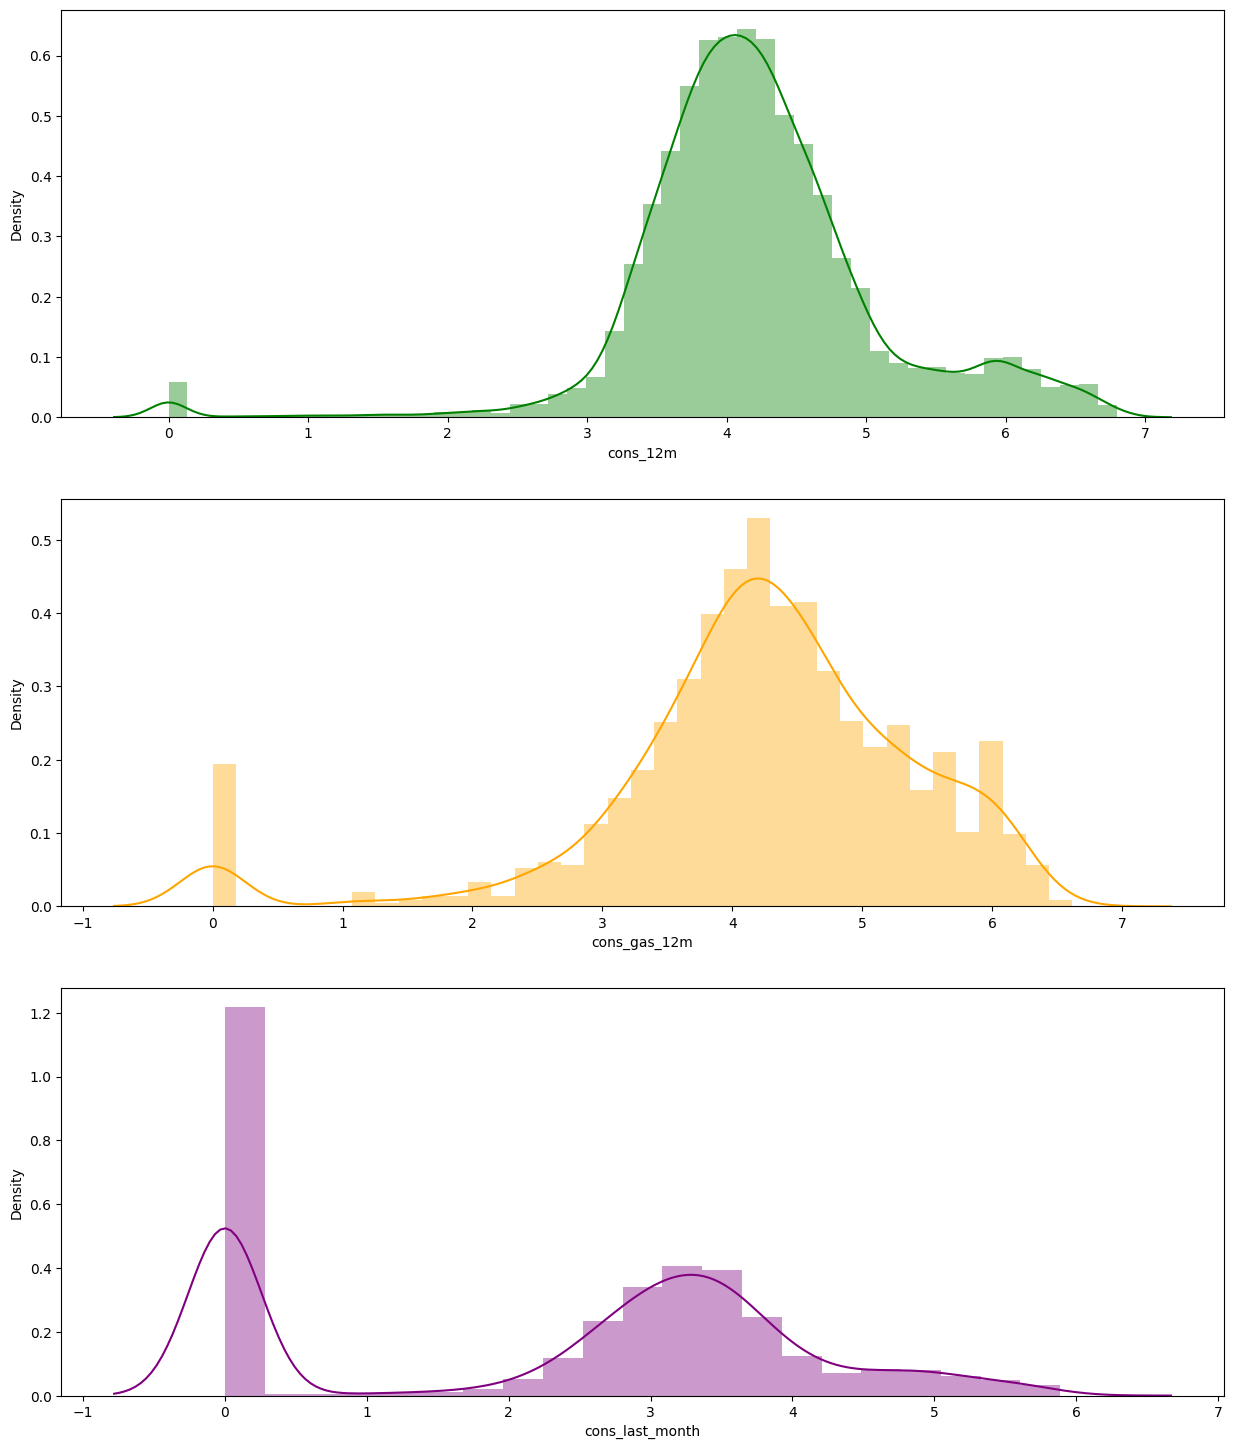

In [245]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 18))
# Plot histograms
sns.distplot((data["cons_12m"].dropna()), ax=axs[0], color='g')
sns.distplot((data[data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1], color='orange')
sns.distplot((data["cons_last_month"].dropna()), ax=axs[2], color='purple')

plt.show()

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               14606 non-null  object 
 1   cons_12m                         14606 non-null  float64
 2   cons_gas_12m                     14606 non-null  float64
 3   cons_last_month                  14606 non-null  float64
 4   forecast_cons_12m                14606 non-null  float64
 5   forecast_cons_year               14606 non-null  float64
 6   forecast_discount_energy         14606 non-null  float64
 7   forecast_meter_rent_12m          14606 non-null  float64
 8   forecast_price_energy_off_peak   14606 non-null  float64
 9   forecast_price_energy_peak       14606 non-null  float64
 10  forecast_price_pow_off_peak      14606 non-null  float64
 11  has_gas                          14606 non-null  int64  
 12  imp_cons          

## MODEL

## **Logistic Regression MODEL**

In [247]:
# Make a copy of our data
train_df = data.copy()

# Separate target variable from independent variables
X = data.drop(columns=['id', 'churn'])
y = data['churn']

In [248]:
X

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,var_6m_price_mid_peak,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,tenure
0,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.047073,0.040659,1.619163,...,4.423670e+01,0.020057,3.700961,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,156
1,3.668479,0.000000,0.000000,2.280920,0.000000,0.0,1.237292,0.059075,0.000000,1.656207,...,0.000000e+00,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,366
2,2.736397,0.000000,0.000000,1.689841,0.000000,0.0,1.599009,0.066622,0.036589,1.656207,...,0.000000e+00,-0.004670,0.177779,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,313
3,3.200029,0.000000,0.000000,2.382089,0.000000,0.0,1.318689,0.059448,0.000000,1.656207,...,0.000000e+00,-0.004547,0.177779,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,313
4,3.646011,0.000000,2.721811,2.650065,2.721811,0.0,2.122969,0.048014,0.041399,1.619163,...,4.860000e-10,-0.006192,0.162916,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,4.508812,4.680707,0.000000,3.667360,0.000000,0.0,1.291591,0.056259,0.000000,1.656207,...,0.000000e+00,-0.008653,0.177779,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000,206
14602,3.858778,0.000000,2.260071,2.801191,2.260071,0.0,2.161458,0.041459,0.038180,1.778122,...,2.987132e-04,-0.007395,0.236694,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418,208
14603,3.265996,0.000000,2.255273,2.281919,2.255273,0.0,2.115943,0.048014,0.041399,1.619163,...,4.860000e-10,-0.006192,0.162916,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,208
14604,2.120574,0.000000,0.000000,1.308351,0.000000,0.0,0.912753,0.059075,0.000000,1.656207,...,0.000000e+00,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,208


In [249]:
y

,churn
0,1
1,0
2,0
3,0
4,0
...,...
14601,0
14602,1
14603,1
14604,0


In [250]:
from sklearn.linear_model  import LogisticRegression
LR = LogisticRegression()


In [251]:
# Train Data and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [252]:
LR.fit(X_train,y_train)

LogisticRegression()

In [261]:
y_pred = LR.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


## **Random Forest MODEL**

In [262]:
from sklearn.ensemble import RandomForestClassifier

In [263]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)

In [264]:
RF.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [265]:
pred = RF.predict(X_test)

In [266]:
pred

array([0, 0, 0, ..., 0, 0, 0])

## MODEL PERFOMANCE TEST using metrics

In [268]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Logistic Regression Metrics
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)
lr_roc_auc = roc_auc_score(y_test, y_pred)
lr_confusion_matrix = confusion_matrix(y_test, y_pred)


print("Logistic Regression Metrics:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)
print("ROC AUC:", lr_roc_auc)
print("Confusion Matrix:\n", lr_confusion_matrix)


# Random Forest Metrics
rf_accuracy = accuracy_score(y_test, pred)
rf_precision = precision_score(y_test, pred)
rf_recall = recall_score(y_test, pred)
rf_f1 = f1_score(y_test, pred)
rf_roc_auc = roc_auc_score(y_test, pred)
rf_confusion_matrix = confusion_matrix(y_test, pred)

print("\nRandom Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("ROC AUC:", rf_roc_auc)
print("Confusion Matrix:\n", rf_confusion_matrix)


**Logistic Regression Metrics**:
Accuracy: 0.8952772073921971
Precision: 0.3333333333333333
Recall: 0.003278688524590164
F1-score: 0.006493506493506494
ROC AUC: 0.5012572273345152
Confusion Matrix:
 [[2615    2]
 [ 304    1]]

**Random Forest Metrics**:
Accuracy: 0.8986995208761123
Precision: 0.7142857142857143
Recall: 0.04918032786885246
F1-score: 0.09202453987730061
ROC AUC: 0.5234438131510866
Confusion Matrix:
 [[2611    6]
 [ 290   15]]


In [ ]:
### TO Evaluate Performance used ROC

In [273]:
y_scores = LR.predict_proba(X_test)
print(y_scores[:10])

[[0.9419305  0.0580695 ]
 [0.93451449 0.06548551]
 [0.94057982 0.05942018]
 [0.90400281 0.09599719]
 [0.85889992 0.14110008]
 [0.93805859 0.06194141]
 [0.92504291 0.07495709]
 [0.92767219 0.07232781]
 [0.90780083 0.09219917]
 [0.95444161 0.04555839]]


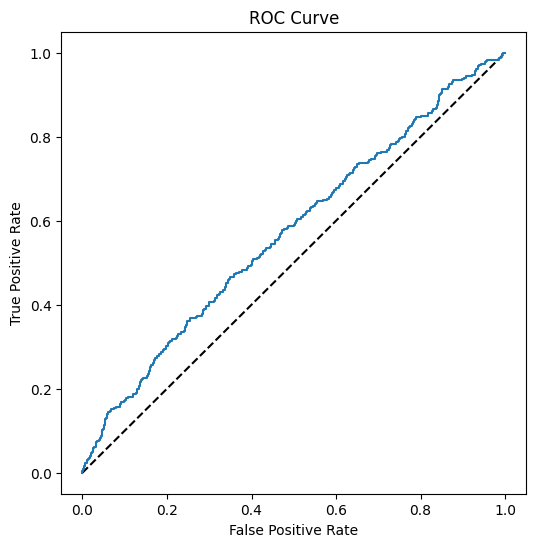

In [274]:
from sklearn.metrics import roc_curve
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [275]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.5705369056045905


In [276]:
y_score_RF = RF.predict_proba(X_test)

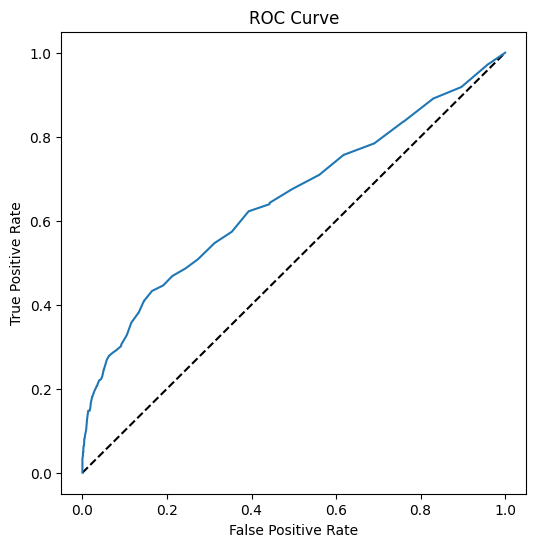

In [277]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score_RF[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()